# Eighth Data AnalysisProcess

In this notebook file, countplots will be plotted for ColorType categorical feature, and boxplots will be plotted to check the output rate distributions of the categories

In [1]:
#Libraries are being imported
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlibVersion
import seaborn as sns

In [2]:
#Settings for Graphic Libraries are being made
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
#Library versions are being printed
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlibVersion)
print('seaborn Version: ' + sns.__version__)

pandas Version: 1.5.2
matplotlib Version: 3.6.2
seaborn Version: 0.12.1


In [4]:
#A pandas dataframe named as dataFrame is being created by reading the data pkl file created last process
dataFrame = pd.read_pickle("../Data/DataAnalysis/FabricWaste.pkl")
dataFrame.head()

,ProductTypeCategory,ProductType,Maturity,Gender,FabricType,ColorType,CustomerDefinedCategory,IsManualProcess,Red,Green,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
0,Top,T-Shirt,Adult,Female,Single Jersey,SC,Greenish,False,42,47,...,0.064198,4,0,1,1,0,0,6,6,25
1,Top,T-Shirt,Adult,Female,Single Jersey,SC,Orangeish,False,255,229,...,0.060386,0,2,1,0,0,0,3,3,23
2,Top,T-Shirt,Adult,Female,Single Jersey,SC,Bluish,False,173,216,...,0.077121,1,5,2,1,1,1,11,11,30
3,Top,T-Shirt,Adult,Female,Single Jersey,SC,Bluish,False,0,95,...,0.062802,0,4,2,2,0,0,8,8,25
4,Top,T-Shirt,Adult,Female,Single Jersey,SC,Pinkish,False,72,50,...,0.045894,0,3,0,0,0,0,3,3,18


In [5]:
#Information of dataframe is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductTypeCategory      200 non-null    object 
 1   ProductType              200 non-null    object 
 2   Maturity                 200 non-null    object 
 3   Gender                   200 non-null    object 
 4   FabricType               200 non-null    object 
 5   ColorType                200 non-null    object 
 6   CustomerDefinedCategory  200 non-null    object 
 7   IsManualProcess          200 non-null    bool   
 8   Red                      200 non-null    int64  
 9   Green                    200 non-null    int64  
 10  Blue                     200 non-null    int64  
 11  Pus                      200 non-null    int64  
 12  Fine                     200 non-null    int64  
 13  G/M2                     200 non-null    int64  
 14  Cotton                   2

In [6]:
#Statistical information of dataframe is being printed
dataFrame.describe()

,Red,Green,Blue,Pus,Fine,G/M2,Cotton,Nylon,Fiber,Linen,...,DefectRate,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,106.710000,100.380000,113.625000,32.330000,25.210000,171.500000,0.915950,0.001500,0.012800,0.045000,...,0.044340,4.605000,6.440000,0.485000,2.150000,0.235000,0.390000,14.045000,14.305000,21.880000
std,97.684272,92.426451,86.773397,0.744224,3.933607,45.514921,0.228904,0.008551,0.018706,0.207824,...,0.023203,17.502016,8.555253,1.782036,4.618893,1.271953,1.359094,27.749109,27.981005,33.984856
min,-1.000000,-1.000000,-1.000000,32.000000,14.000000,125.000000,0.000000,0.000000,0.000000,0.000000,...,0.005587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,3.000000,32.000000,22.000000,125.000000,0.960000,0.000000,0.000000,0.000000,...,0.028531,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,9.000000
50%,94.000000,90.000000,112.000000,32.000000,28.000000,175.000000,1.000000,0.000000,0.000000,0.000000,...,0.038528,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,7.000000,7.000000,14.000000
75%,218.000000,186.250000,200.250000,32.000000,28.000000,190.000000,1.000000,0.000000,0.040000,0.000000,...,0.058106,2.000000,8.000000,0.000000,2.000000,0.000000,0.000000,12.000000,12.250000,20.000000
max,255.000000,255.000000,255.000000,34.000000,28.000000,320.000000,1.000000,0.050000,0.040000,1.000000,...,0.118812,195.000000,86.000000,19.000000,43.000000,15.000000,10.000000,302.000000,303.000000,353.000000


<AxesSubplot: xlabel='ColorType', ylabel='count'>

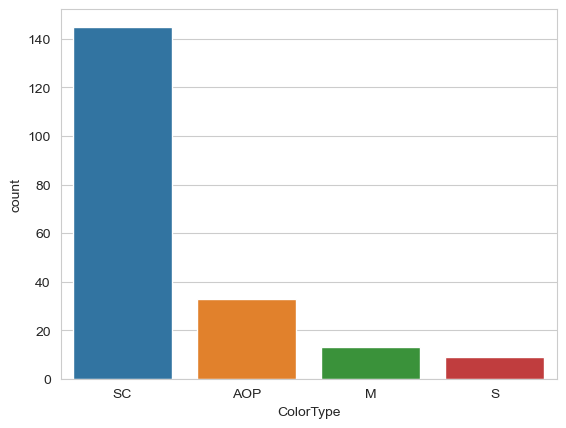

In [7]:
#Chart that showing distribution of ColorType categorical feature values in dataFrame is being plotted
columnOrder = dataFrame['ColorType'].value_counts().index
sns.countplot(x = 'ColorType', data = dataFrame, order = columnOrder)

<AxesSubplot: xlabel='ColorType', ylabel='PrintErrorRate'>

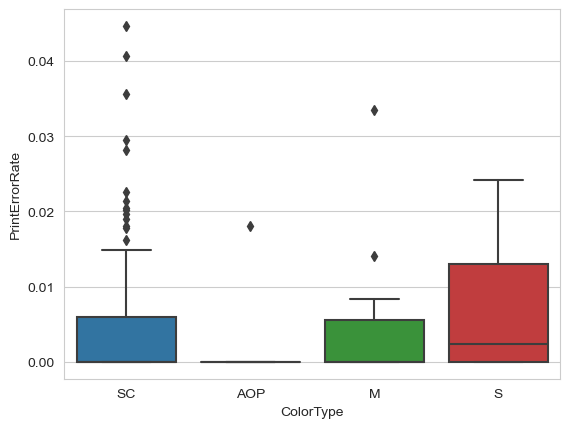

In [8]:
#A boxplot, to check the PrintErrorRate distributions for each ColorType value, is being plotted
sns.boxplot(x = 'ColorType', y = 'PrintErrorRate', data = dataFrame, order = columnOrder)

<AxesSubplot: xlabel='ColorType', ylabel='SewingErrorRate'>

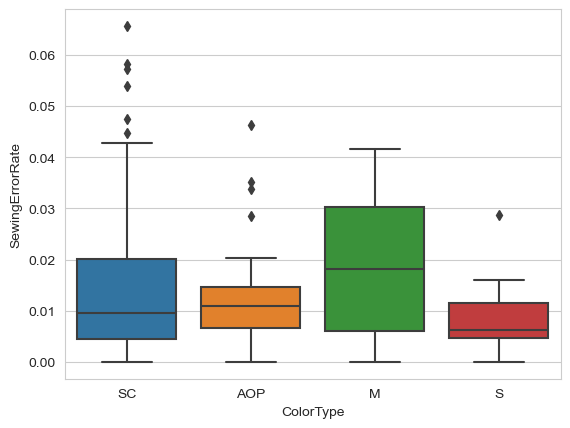

In [9]:
#A boxplot, to check the SewingErrorRate distributions for each ColorType value, is being plotted
sns.boxplot(x = 'ColorType', y = 'SewingErrorRate', data = dataFrame, order = columnOrder)

<AxesSubplot: xlabel='ColorType', ylabel='FabricStainRate'>

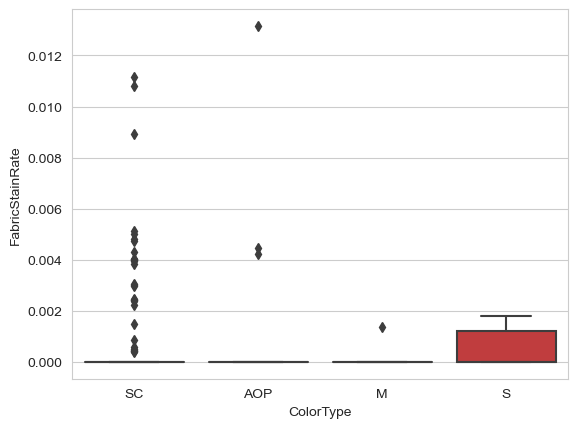

In [10]:
#A boxplot, to check the FabricStainRate distributions for each ColorType value, is being plotted
sns.boxplot(x = 'ColorType', y = 'FabricStainRate', data = dataFrame, order = columnOrder)

<AxesSubplot: xlabel='ColorType', ylabel='FabricErrorRate'>

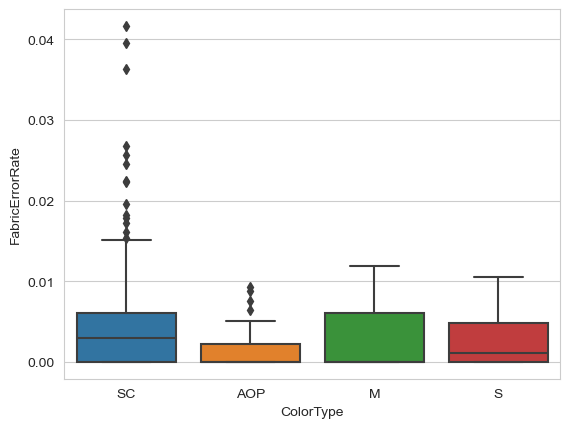

In [11]:
#A boxplot, to check the FabricErrorRate distributions for each ColorType value, is being plotted
sns.boxplot(x = 'ColorType', y = 'FabricErrorRate', data = dataFrame, order = columnOrder)

<AxesSubplot: xlabel='ColorType', ylabel='EmbroideryErrorRate'>

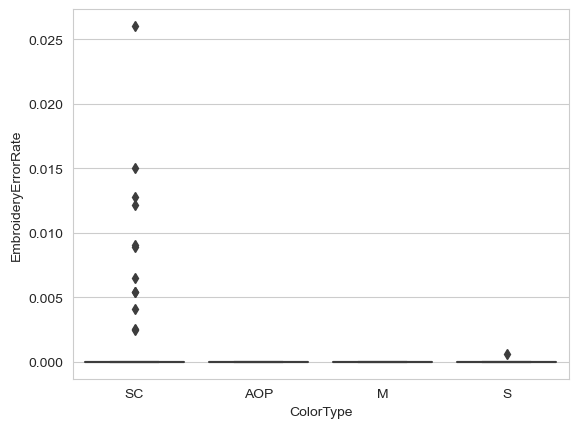

In [12]:
#A boxplot, to check the EmbroideryErrorRate distributions for each ColorType value, is being plotted
sns.boxplot(x = 'ColorType', y = 'EmbroideryErrorRate', data = dataFrame, order = columnOrder)

<AxesSubplot: xlabel='ColorType', ylabel='MeasureErrorRate'>

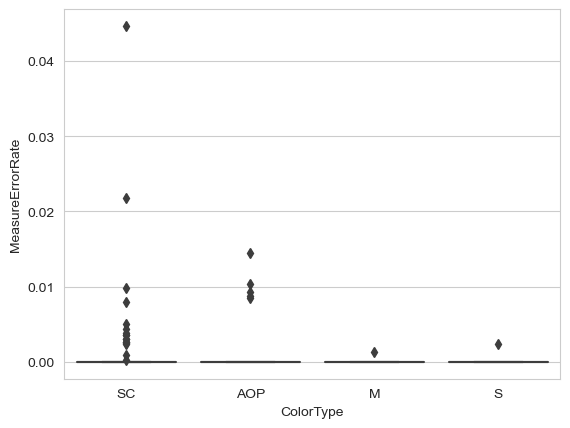

In [13]:
#A boxplot, to check the MeasureErrorRate distributions for each ColorType value, is being plotted
sns.boxplot(x = 'ColorType', y = 'MeasureErrorRate', data = dataFrame, order = columnOrder)

<AxesSubplot: xlabel='ColorType', ylabel='SecondQualityRate'>

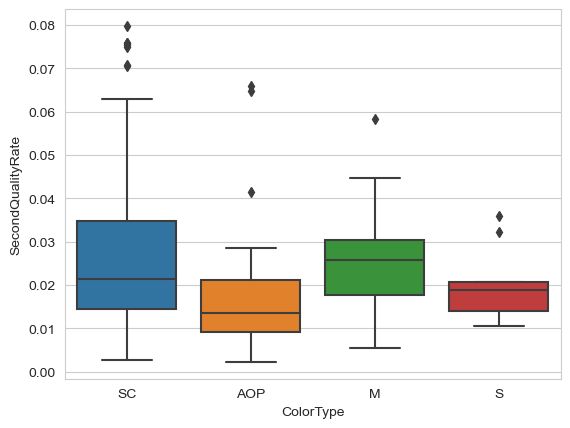

In [14]:
#A boxplot, to check the SecondQualityRate distributions for each ColorType value, is being plotted
sns.boxplot(x = 'ColorType', y = 'SecondQualityRate', data = dataFrame, order = columnOrder)

<AxesSubplot: xlabel='ColorType', ylabel='DefectRate'>

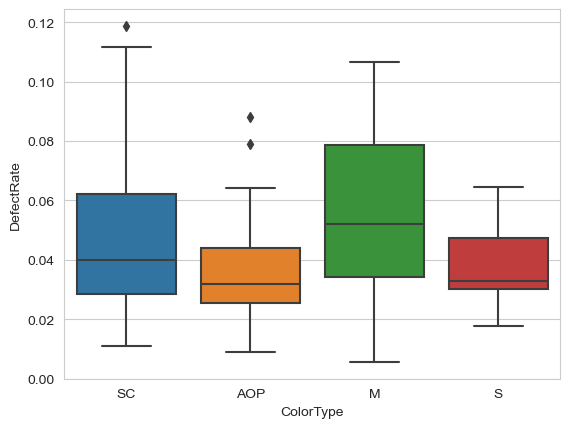

In [15]:
#A boxplot, to check the DefectRate distributions for each ColorType value, is being plotted
sns.boxplot(x = 'ColorType', y = 'DefectRate', data = dataFrame, order = columnOrder)